# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | tazovsky
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | yagry
City not found. Skipping...
Processing Record 6 of Set 1 | ulladulla
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | talcahuano
Processing Record 10 of Set 1 | al jawf
Processing Record 11 of Set 1 | nurota
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | kangal
Processing Record 15 of Set 1 | acapulco de juarez
Processing Record 16 of Set 1 | la'ie
Processing Record 17 of Set 1 | guachochi
City not found. Skipping...
Processing Record 18 of Set 1 | nuuk
Processing Record 19 of Set 1 | gadzhiyevo
Processing Record 20 of Set 1 | dingras
Processing Record 21 of Set 1 | oyama
Proc

Processing Record 39 of Set 4 | asau
Processing Record 40 of Set 4 | richfield
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | fale old settlement
Processing Record 43 of Set 4 | borodulikha
Processing Record 44 of Set 4 | hadibu
Processing Record 45 of Set 4 | arno
Processing Record 46 of Set 4 | mugia
Processing Record 47 of Set 4 | polyarnyy
Processing Record 48 of Set 4 | salalah
Processing Record 49 of Set 4 | ha giang
Processing Record 0 of Set 5 | maragogi
Processing Record 1 of Set 5 | fort mcmurray
Processing Record 2 of Set 5 | lihue
Processing Record 3 of Set 5 | blenheim
Processing Record 4 of Set 5 | praia da vitoria
Processing Record 5 of Set 5 | saint-philippe
Processing Record 6 of Set 5 | kawm umbu
Processing Record 7 of Set 5 | laguna
Processing Record 8 of Set 5 | kabalo
Processing Record 9 of Set 5 | kapa'a
Processing Record 10 of Set 5 | arraial do cabo
Processing Record 11 of Set 5 | shamgarh
Processing Record 12 of Set 5 | vingt cinq
City n

Processing Record 32 of Set 8 | nabire
Processing Record 33 of Set 8 | kolonia town
Processing Record 34 of Set 8 | cimislia
Processing Record 35 of Set 8 | smirnykh
Processing Record 36 of Set 8 | smithers
Processing Record 37 of Set 8 | madzhalis
Processing Record 38 of Set 8 | fort st. john
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | konibodom
Processing Record 41 of Set 8 | prabumulih
Processing Record 42 of Set 8 | lionel town
Processing Record 43 of Set 8 | gizo
Processing Record 44 of Set 8 | kohat
Processing Record 45 of Set 8 | chonchi
Processing Record 46 of Set 8 | cabo san lucas
Processing Record 47 of Set 8 | san andros
City not found. Skipping...
Processing Record 48 of Set 8 | tafuna
Processing Record 49 of Set 8 | saint-joseph
Processing Record 0 of Set 9 | taiobeiras
Processing Record 1 of Set 9 | nova sintra
Processing Record 2 of Set 9 | kristiansund
Processing Record 3 of Set 9 | akureyri
Processing Record 4 of Set 9 | al majaridah
Proce

Processing Record 22 of Set 12 | makhambet
Processing Record 23 of Set 12 | baluntaicun
City not found. Skipping...
Processing Record 24 of Set 12 | soufriere
Processing Record 25 of Set 12 | kenora
Processing Record 26 of Set 12 | enewetak
Processing Record 27 of Set 12 | muncar
Processing Record 28 of Set 12 | coquimbo
Processing Record 29 of Set 12 | kingscliff
Processing Record 30 of Set 12 | tacna
Processing Record 31 of Set 12 | roma
Processing Record 32 of Set 12 | sao joaquim
Processing Record 33 of Set 12 | aykhal
Processing Record 34 of Set 12 | mili
Processing Record 35 of Set 12 | miyako
Processing Record 36 of Set 12 | udaipur
Processing Record 37 of Set 12 | minab
Processing Record 38 of Set 12 | la sarre
Processing Record 39 of Set 12 | corumba
Processing Record 40 of Set 12 | tazacorte
Processing Record 41 of Set 12 | sihanoukville
Processing Record 42 of Set 12 | tenenkou
Processing Record 43 of Set 12 | khoyniki
Processing Record 44 of Set 12 | ribeira brava
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,2.09,60,75,1.03,CA,1712291413
1,anadyr,64.7500,177.4833,-11.72,78,0,6.00,RU,1712291413
2,tazovsky,67.4667,78.7000,-16.67,94,96,6.76,RU,1712291210
3,edinburgh of the seven seas,-37.0676,-12.3116,17.79,88,100,9.87,SH,1712291414
4,ulladulla,-35.3500,150.4667,17.65,91,100,3.99,AU,1712291414


In [6]:
# Export the City_Data into a csv
if not os.path.exists('output_data'):
    os.mkdir('output_data')
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,2.09,60,75,1.03,CA,1712291413
1,anadyr,64.7500,177.4833,-11.72,78,0,6.00,RU,1712291413
2,tazovsky,67.4667,78.7000,-16.67,94,96,6.76,RU,1712291210
3,edinburgh of the seven seas,-37.0676,-12.3116,17.79,88,100,9.87,SH,1712291414
4,ulladulla,-35.3500,150.4667,17.65,91,100,3.99,AU,1712291414


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

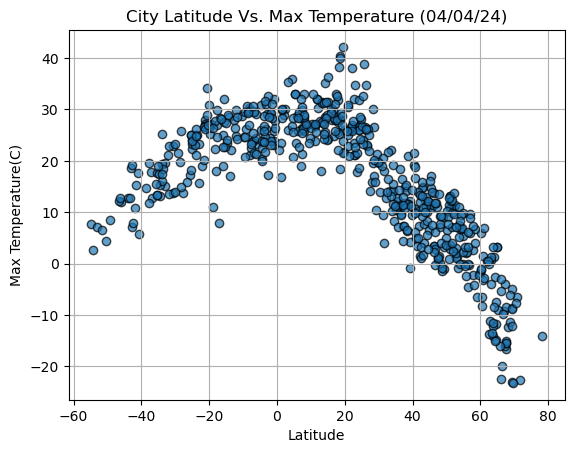

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], linewidth=1, marker='o', edgecolor='black', alpha = 0.7, label = 'Cities')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Max Temperature (%s)' % time.strftime('%x'))
plt.ylabel('Max Temperature(C)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

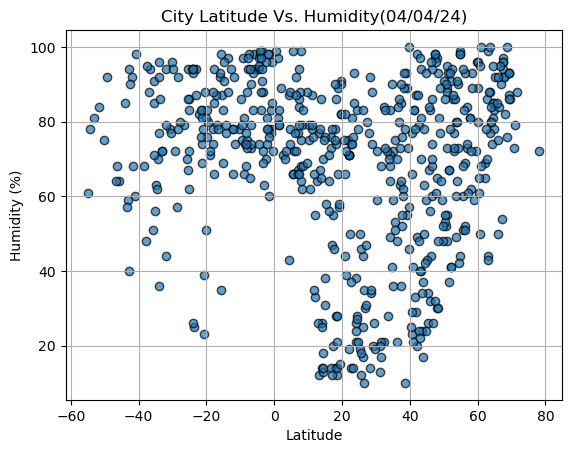

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], linewidth=1, marker='o', edgecolor='black', alpha = 0.7, label = 'Cities')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Humidity(%s)' % time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

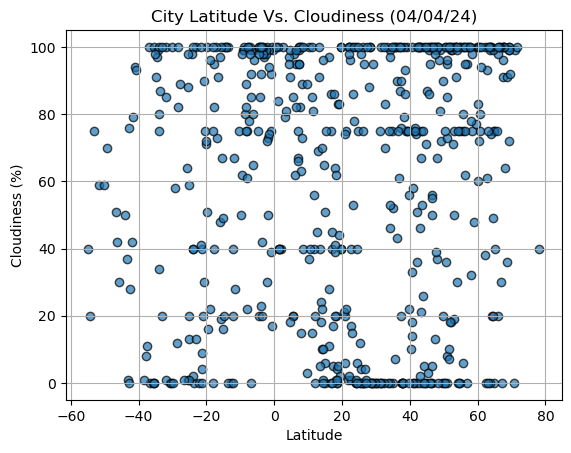

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], linewidth=1, marker='o', edgecolor='black', alpha = 0.7, label = 'Cities')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

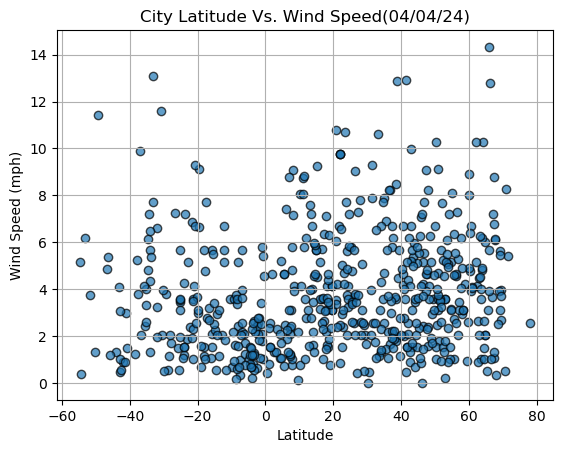

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], linewidth=1, marker='o', edgecolor='black', alpha = 0.7, label = 'Cities')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Wind Speed(%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_plot(xvalue, yvalue, title, textlocation):

    (slope, intercept, rvalue, pvalue, stderr) = linregress (xvalues, yvalues)
    regress_y = xvalues*slope + intercept
    lineequation = 'y = ' +str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

    plt.scatter(xvalues, yvalues)
    plt.plot(xvalues, regress_y, 'r-')
    plt.annotate(lineequation, textlocation, fontsize=15, color = 'red')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f'The r-value is {rvalue}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,2.09,60,75,1.03,CA,1712291413
1,anadyr,64.7500,177.4833,-11.72,78,0,6.00,RU,1712291413
2,tazovsky,67.4667,78.7000,-16.67,94,96,6.76,RU,1712291210
8,al jawf,29.5000,38.7500,21.25,26,0,2.06,SA,1712291415
9,nurota,40.5614,65.6886,19.25,23,33,4.17,UZ,1712291415


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[(city_data_df['Lat'] <0)]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,17.79,88,100,9.87,SH,1712291414
4,ulladulla,-35.3500,150.4667,17.65,91,100,3.99,AU,1712291414
5,puerto ayora,-0.7393,-90.3518,23.08,96,17,1.03,EC,1712291414
6,waitangi,-43.9535,-176.5597,12.68,85,50,1.34,NZ,1712291160
7,talcahuano,-36.7167,-73.1167,12.82,94,0,2.06,CL,1712291400


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.9008865010355404


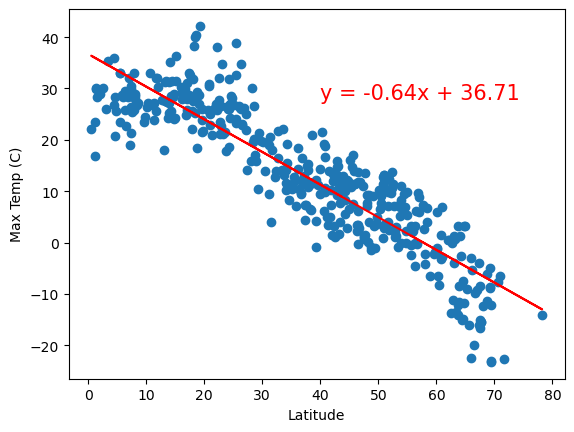

In [15]:
# Linear regression on Northern Hemisphere
xvalues = northern_df ['Lat']
yvalues = northern_df ['Max Temp']
linear_plot(xvalues, yvalues, 'Max Temp (C)', (40,28))

The r-value is 0.7499740141781648


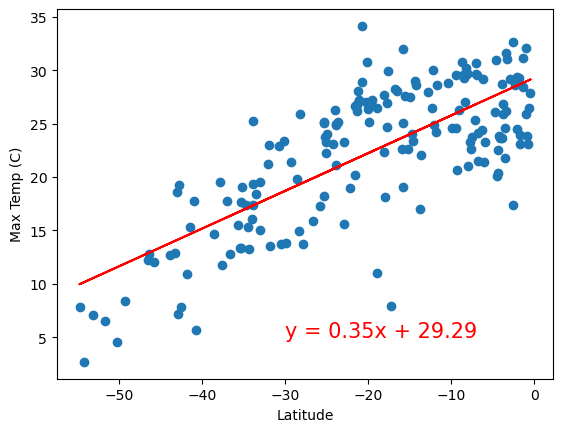

In [16]:
# Linear regression on Southern Hemisphere
xvalues = southern_df ['Lat']
yvalues = southern_df ['Max Temp']
linear_plot(xvalues, yvalues, 'Max Temp (C)', (-30,5))

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a strong negative correlation between the latitude (as we move away from the equator) and the max temperature.  In the southern hemisphere, it is the opposite (moderate positive correlation) because instead of moving away from the equator, we are moving towards the equator as we progress along the x-axis.  Based on these two models, the Max-Temp is strongest in locations closer to the equator (latitude 0). We can also see that the Max Temp is greatly affected by Latitude.


### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.22724815497692996


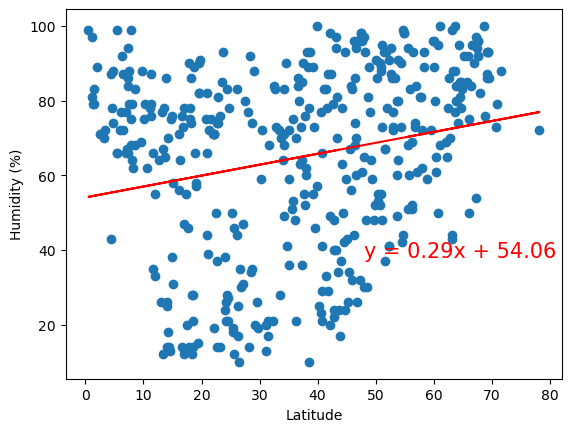

In [17]:
# Northern Hemisphere
xvalues = northern_df ['Lat']
yvalues = northern_df ['Humidity']
linear_plot(xvalues, yvalues, 'Humidity (%)', (48,38))

The r-value is 0.23856811775578124


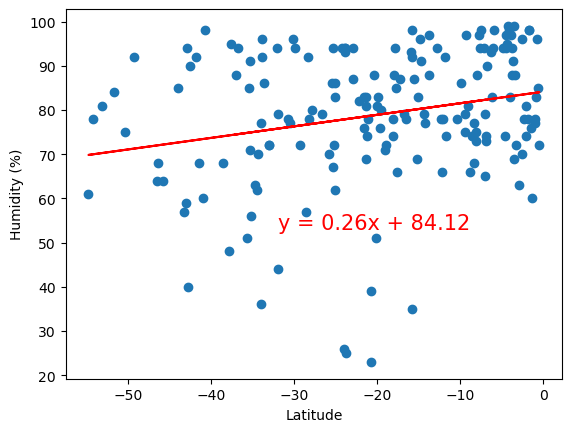

In [26]:
# Southern Hemisphere
xvalues = southern_df ['Lat']
yvalues = southern_df ['Humidity']
linear_plot(xvalues, yvalues, 'Humidity (%)', (-32,53))

**Discussion about the linear relationship:** The Northern hemisphere has a very weak positive correlation between the Latitude and Humidity.  The Southern Hemispherewith an r-value less than 0.3, also has a weak correlation between Latitude and Humidity.  The Latitude of a location does not seem to have a significant effect on Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.1550968605537854


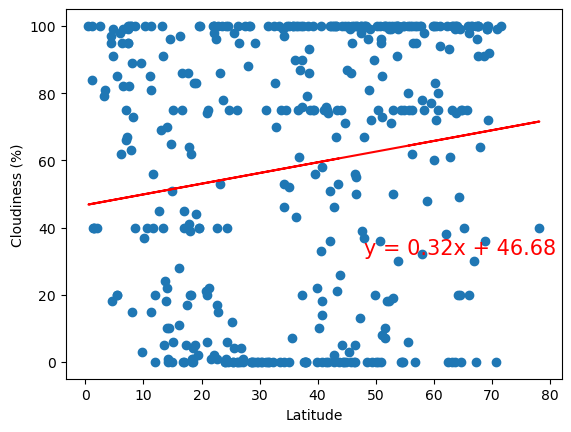

In [27]:
# Northern Hemisphere
xvalues = northern_df ['Lat']
yvalues = northern_df ['Cloudiness']
linear_plot(xvalues, yvalues, 'Cloudiness (%)', (48,32))

The r-value is 0.2855883494651295


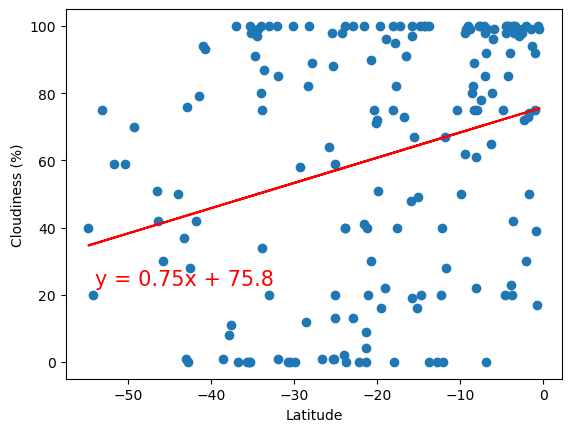

In [28]:
# Southern Hemisphere
xvalues = southern_df ['Lat']
yvalues = southern_df ['Cloudiness']
linear_plot(xvalues, yvalues, 'Cloudiness (%)', (-54,23))

**Discussion about the linear relationship:** There is little to no correlation in the northern hemisphere between the Latitude and Cloudiness, while there is a weak positive correlation in the southern hemisphere between the same factors.  The latitude of each location does not have a significant relationship to the Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.08666423584499146


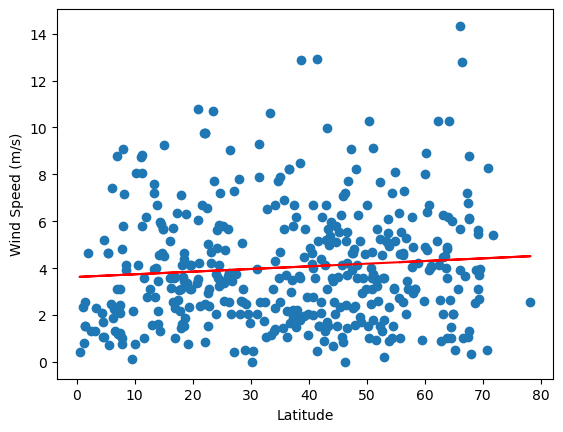

In [29]:
# Northern Hemisphere
xvalues = northern_df ['Lat']
yvalues = northern_df ['Wind Speed']
linear_plot(xvalues, yvalues, 'Wind Speed (m/s)', (0,27))

The r-value is -0.2660117875558749


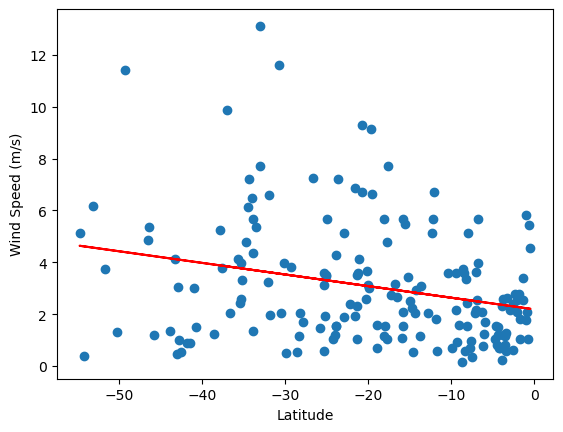

In [30]:
# Southern Hemisphere
xvalues = southern_df ['Lat']
yvalues = southern_df ['Wind Speed']
linear_plot(xvalues, yvalues, 'Wind Speed (m/s)', (-51,23))

**Discussion about the linear relationship:** The northern hemisphere has little to no correlation between the Latitude and Wind Speed.  In the southern hemisphere, we have a week negative correlation between the Latitude and the Windspeed.  From this model it appears that as we approach the equator from the south, the wind speed decreases.  However, with a low r-squared value, this model is not ideal to use to predict the Wind Speed of other locations.